# Aula 07 –  AutoML com Pycaret

O PyCaret é uma biblioteca de machine learning de alto nível para Python, projetada para facilitar o processo de criação e experimentação com modelos de aprendizado de máquina. Ela fornece uma interface simples e intuitiva para várias tarefas de aprendizado supervisionado e não supervisionado, permitindo que você crie, avalie, ajuste e implemente modelos rapidamente, sem a necessidade de se aprofundar em detalhes complexos de código.

# Como funciona o PyCaret ?

Em vez de você precisar configurar várias etapas manualmente (como preparação de dados, treinamento de modelos, validação, e avaliação), o PyCaret oferece uma estrutura de fluxo de trabalho simplificado:

## 1. Setup
Primeiramente, você configura os dados (como tipo de variável alvo, variáveis categóricas, etc.).

## 2. Criação de Modelos
Você pode criar diferentes modelos de machine learning, como regressão ou classificação, com apenas algumas linhas de código.

## 3. Avaliação
O PyCaret gera automaticamente gráficos, métricas de performance e outras avaliações de modelos.

## 4. Comparação de Modelos
Ele facilita a comparação entre diferentes modelos com base em métricas de performance, para que você possa escolher o melhor modelo.

## 5. Ajuste e Otimização
Você pode otimizar o modelo ajustando seus hiperparâmetros para maximizar sua performance.

## 6. Implementação
Finalmente, você pode salvar o modelo treinado e implementá-lo facilmente para previsões futuras.


### Instalação do PyCaret

In [1]:
pip install pycaret

## Imports

In [2]:
# Importando as bibliotecas necessárias
from pycaret.classification import *  # Para realizar o pré-processamento e criação de modelos de classificação com PyCaret
import pandas as pd  # Para manipulação de dados com DataFrame
import numpy as np  # Para operações numéricas, como o cálculo de percentis
from matplotlib import pyplot as plt  # Para visualizações gráficas
import seaborn as sns  # Para visualizações estatísticas mais avançadas
from sklearn.model_selection import train_test_split # Dividir o dataset em treino e teste

## Carregar dados

In [3]:
# Carregar o dataset do UCI Repository - German Credit Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    "Savings", "Employment", "InstallmentRate", "PersonalStatus", "OtherDebtors",
    "ResidenceSince", "Property", "Age", "OtherInstallment", "Housing",
    "ExistingCredits", "Job", "NumLiable", "Telephone", "ForeignWorker", "target"
]
df = pd.read_csv(url, sep=" ", names=columns)


In [4]:
df.head(2)

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,Employment,InstallmentRate,PersonalStatus,OtherDebtors,...,Property,Age,OtherInstallment,Housing,ExistingCredits,Job,NumLiable,Telephone,ForeignWorker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2


In [5]:
df["target"].value_counts() # 1 é cliente bom , 2 é mau

,count
target,
1,700
2,300


## Data

In [6]:
train_data, test_data = train_test_split(df, test_size=0.3,stratify=df['target'], random_state=42)

## Inicializar o PyCaret

In [7]:
# Inicializando o ambiente do PyCaret para uma tarefa de classificação
clf = setup(
    data=train_data,           # O DataFrame que contém os dados de treinamento (df)
    target="target",   # Nome da coluna alvo (a variável que queremos prever)
    session_id=123,    # Um número fixo para garantir reprodutibilidade dos resultados
    fold= 5            # Número de folds para validação cruzada (neste caso, 10)
)


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(700, 21)"
5,Transformed data shape,"(700, 60)"
6,Transformed train set shape,"(489, 60)"
7,Transformed test set shape,"(211, 60)"
8,Numeric features,7
9,Categorical features,13


## Executar AutoML

In [8]:
# Comparar modelos e escolher o melhor
best_model = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7342,0.7661,0.7342,0.7161,0.7055,0.2727,0.2968,0.7320
gbc,Gradient Boosting Classifier,0.7342,0.7572,0.7342,0.7257,0.7200,0.3165,0.3314,0.4160
lightgbm,Light Gradient Boosting Machine,0.7282,0.7552,0.7282,0.7197,0.7157,0.3071,0.3199,0.3580
lr,Logistic Regression,0.7219,0.7507,0.7219,0.7095,0.7121,0.2997,0.3042,4.0900
xgboost,Extreme Gradient Boosting,0.7199,0.7460,0.7199,0.7081,0.7072,0.2861,0.2955,0.5060
et,Extra Trees Classifier,0.7280,0.7447,0.7280,0.7076,0.7054,0.2758,0.2895,0.5000
ridge,Ridge Classifier,0.7035,0.7422,0.7035,0.6861,0.6887,0.2404,0.2470,0.2400
lda,Linear Discriminant Analysis,0.7076,0.7395,0.7076,0.6942,0.6971,0.2640,0.2684,0.2380
ada,Ada Boost Classifier,0.7117,0.7087,0.7117,0.7010,0.7028,0.2790,0.2837,0.3720
nb,Naive Bayes,0.6707,0.6965,0.6707,0.7014,0.6788,0.2740,0.2818,0.4960


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Avaliar modelo

In [9]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Treino do Melhor Modelo - Random Forest

In [10]:
# Criando e treinando um modelo Random Forest
rf_model = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7347,0.7719,0.7347,0.7194,0.6817,0.2042,0.2583
1,0.7245,0.7316,0.7245,0.7013,0.7024,0.2572,0.2698
2,0.7143,0.7527,0.7143,0.6871,0.6774,0.2097,0.2350
3,0.7245,0.7779,0.7245,0.7096,0.7130,0.3062,0.3113
4,0.7732,0.7961,0.7732,0.7631,0.7528,0.3861,0.4097
Mean,0.7342,0.7661,0.7342,0.7161,0.7055,0.2727,0.2968
Std,0.0205,0.0221,0.0205,0.0258,0.0271,0.0676,0.0616


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Avaliar o Melhor Modelo

In [11]:
# Avaliar o modelo
evaluate_model(rf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Otimização Hiperparâmetros - Algoritmo Random Forest

In [28]:
# Ajustando os hiperparâmetros do modelo Random Forest usando validação cruzada (10 folds)
tuned_rf = tune_model(rf_model, fold=5, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7449,0.7931,0.7449,0.7475,0.7461,0.3939,0.3940
1,0.6327,0.6937,0.6327,0.6786,0.6466,0.2129,0.2206
2,0.6837,0.7505,0.6837,0.7136,0.6931,0.3130,0.3194
3,0.6735,0.8059,0.6735,0.7335,0.6861,0.3311,0.3513
4,0.7320,0.8017,0.7320,0.7831,0.7426,0.4383,0.4598
Mean,0.6933,0.7690,0.6933,0.7313,0.7029,0.3378,0.3490
Std,0.0408,0.0425,0.0408,0.0348,0.0374,0.0768,0.0796


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [29]:
# Visualizar os hiperparâmetros do modelo
print(tuned_rf.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 6, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 190, 'n_jobs': -1, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}


## Avaliação do Modelo Final

## ROC AUC

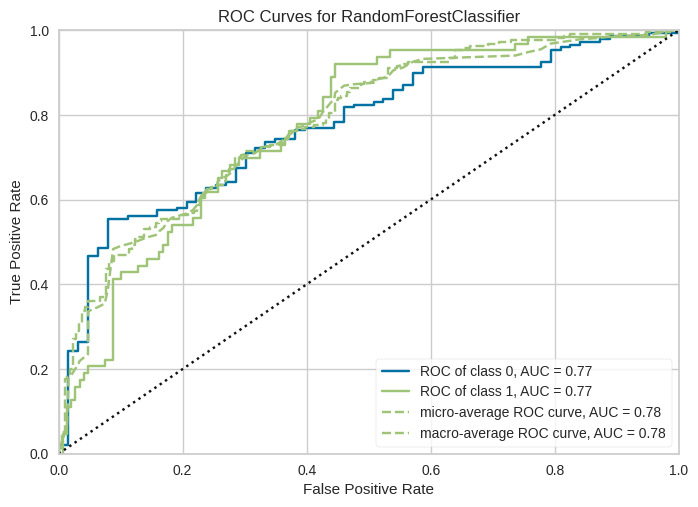

In [30]:
plot_model(tuned_rf, plot = 'auc')

### Matriz de Confusão

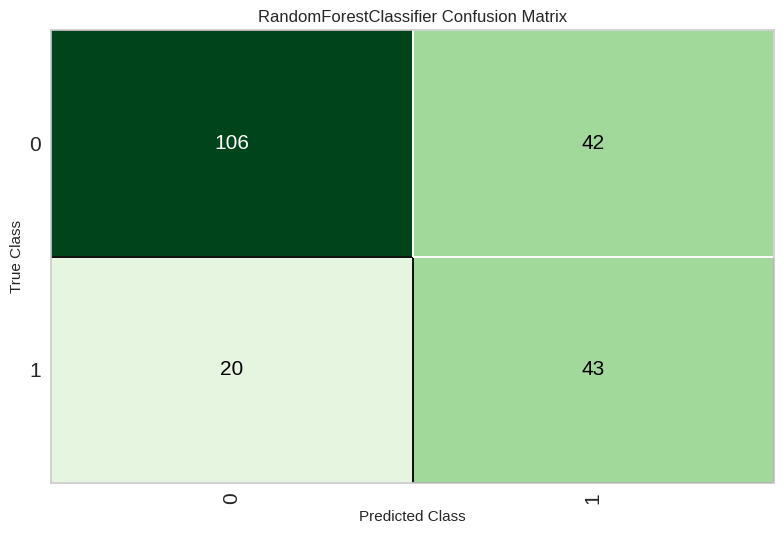

In [31]:
plot_model(tuned_rf, plot='confusion_matrix')

## Feature Importance

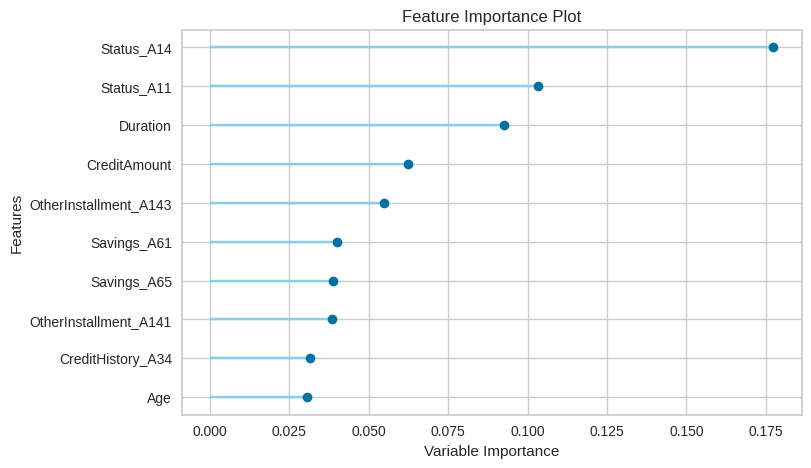

In [32]:
# Plotando a importância das variáveis
plot_model(tuned_rf, plot='feature')

## Previsões - Dados de Teste

In [33]:
# Fazer previsões com probabilidades
df_predict_test = predict_model(tuned_rf, data=test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7333,0.7834,0.7333,0.7679,0.7425,0.4236,0.4354


In [34]:
df_predict_test.head(2)

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,Employment,InstallmentRate,PersonalStatus,OtherDebtors,...,OtherInstallment,Housing,ExistingCredits,Job,NumLiable,Telephone,ForeignWorker,target,prediction_label,prediction_score
115,A14,48,A34,A43,3578,A65,A75,4,A93,A101,...,A143,A152,1,A173,1,A192,A201,1,1,0.7959
346,A12,13,A34,A43,882,A61,A72,4,A93,A103,...,A143,A152,2,A173,1,A191,A201,1,1,0.6164


## Implementação da Solução - Score de Risco de Crédito

In [35]:
df_predict = predict_model(tuned_rf, data=df)
df_predict['score'] = 1000*df_predict['prediction_score']

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7680,0.8529,0.7680,0.8025,0.7761,0.5000,0.5147


In [36]:
df_predict.head(2)

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,Employment,InstallmentRate,PersonalStatus,OtherDebtors,...,Housing,ExistingCredits,Job,NumLiable,Telephone,ForeignWorker,target,prediction_label,prediction_score,score
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A152,2,A173,1,A192,A201,1,1,0.6769,676.9
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A152,1,A173,1,A191,A201,2,2,0.5262,526.2


In [23]:
df_predict.shape

(1000, 24)

In [43]:
df_predict.score.describe()

,score
count,1000.000000
mean,631.405100
std,85.654393
min,500.500000
25%,555.975000
50%,618.950000
75%,701.000000
max,847.300000


In [37]:
print("20th percentile: ",np.percentile(df_predict['score'], 20).round(0))
print("40th percentile: ",np.percentile(df_predict['score'], 40).round(0))
print("60th percentile: ",np.percentile(df_predict['score'], 60).round(0))
print("80th percentile: ",np.percentile(df_predict['score'], 80).round(0))
print("1000th percentile: ",np.percentile(df_predict['score'], 100).round(0))

20th percentile:  546.0
40th percentile:  598.0
60th percentile:  652.0
80th percentile:  716.0
1000th percentile:  847.0


In [25]:
# Criando uma nova variável no dataset chamada de "risco de crédito" para toda a base (Treino + Teste)
df_predict.loc[(df_predict['score'] <= 546)                       , 'risco'] = '5. Altíssimo'
df_predict.loc[(df_predict['score'] > 546) & (df_predict['score']<=598), 'risco'] = '4. Alto'
df_predict.loc[(df_predict['score'] > 598) & (df_predict['score']<=652), 'risco'] = '3. Medio'
df_predict.loc[(df_predict['score'] > 652) & (df_predict['score']<=716), 'risco'] = '2. Baixo'
df_predict.loc[(df_predict['score'] > 716)                       , 'risco'] = ' 1.Baixissimo'
df_predict

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,Employment,InstallmentRate,PersonalStatus,OtherDebtors,...,ExistingCredits,Job,NumLiable,Telephone,ForeignWorker,target,prediction_label,prediction_score,score,risco
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,2,A173,1,A192,A201,1,1,0.6769,676.9,2. Baixo
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,1,A173,1,A191,A201,2,2,0.5262,526.2,5. Altíssimo
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,1,A172,2,A191,A201,1,1,0.7667,766.7,1.Baixissimo
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,1,A173,2,A191,A201,1,2,0.5696,569.6,4. Alto
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,2,A173,2,A191,A201,2,2,0.7286,728.6,1.Baixissimo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,1,A172,1,A191,A201,1,1,0.7184,718.4,1.Baixissimo
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,1,A174,1,A192,A201,1,2,0.6092,609.2,3. Medio
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,1,A173,1,A191,A201,1,1,0.7199,719.9,1.Baixissimo
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,1,A173,1,A192,A201,2,2,0.6951,695.1,2. Baixo


## Análise Exploratória - Score de Crédito

Text(0, 0.5, 'Score de Crédito')

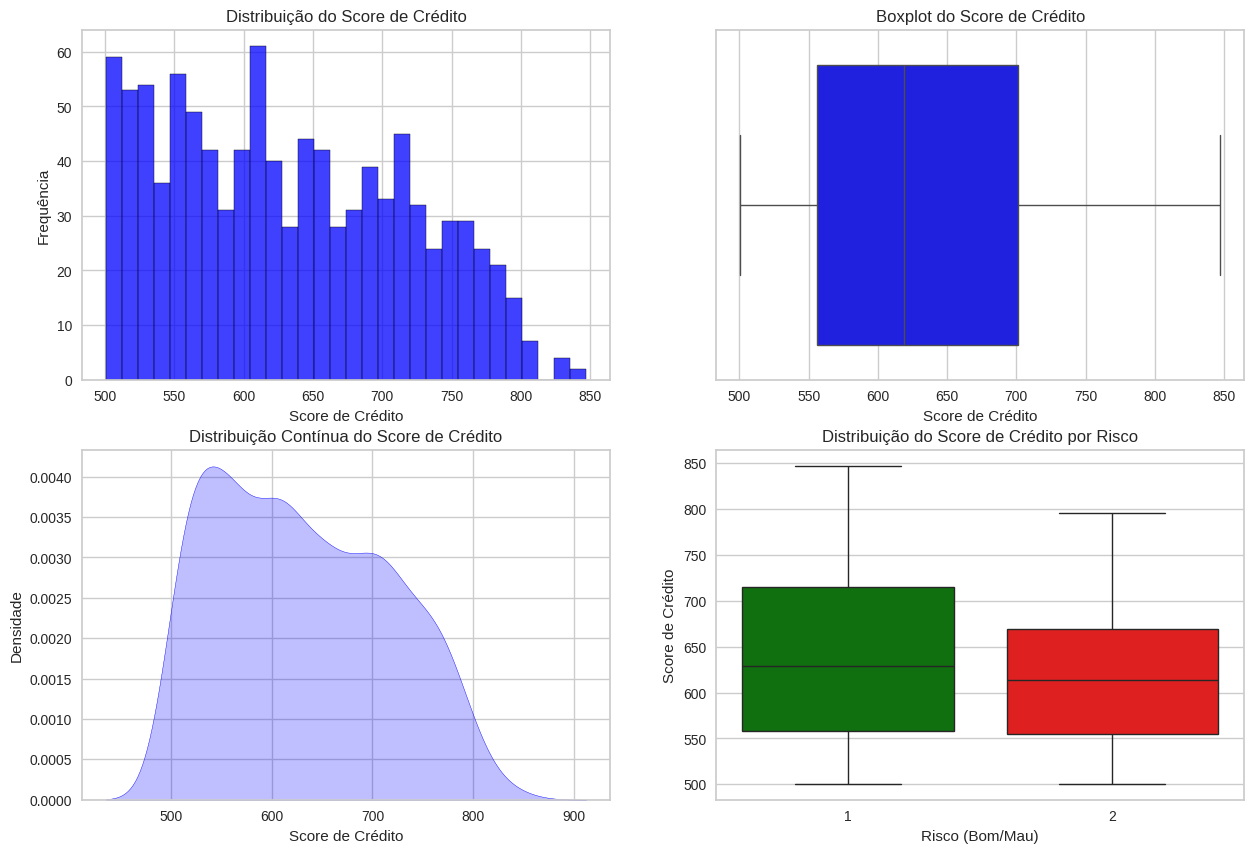

In [41]:
# Definir a figura para os gráficos
plt.figure(figsize=(15, 10))

# 1. Histograma da distribuição do score de crédito
plt.subplot(2, 2, 1)
sns.histplot(df_predict['score'], color='blue', bins=30)
plt.title('Distribuição do Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Frequência')

# 2. Boxplot do score de crédito para ver a variação
plt.subplot(2, 2, 2)
sns.boxplot(x=df_predict['score'], color='blue')
plt.title('Boxplot do Score de Crédito')
plt.xlabel('Score de Crédito')

# 3. KDE (Kernel Density Estimation) para visualizar a distribuição contínua do score de crédito
plt.subplot(2, 2, 3)
sns.kdeplot(df_predict['score'], shade=True, color='blue')
plt.title('Distribuição Contínua do Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Densidade')

# 4. Boxplot do score de crédito por risco (Bom/Mau) com cores personalizadas
plt.subplot(2, 2, 4)
sns.boxplot(x=df_predict['target'], y=df_predict['score'],
            palette={'2': 'red', '1': 'green'})  # '2': Mau (vermelho), '01': Bom (verde)
plt.title('Distribuição do Score de Crédito por Risco')
plt.xlabel('Risco (Bom/Mau)')
plt.ylabel('Score de Crédito')

In [42]:
#Salva a base escorada
path = 'base_escorada_envio_time_negocio_pycaret.csv'
df_predict.to_csv(path, sep = ';', header = True, decimal='.', index= False)